In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os

In [2]:
df = pd.read_csv("car-dataset.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## Identifying the dimensions

In [3]:
df.shape

(4340, 8)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Variable identification

In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

## Univarient Analysis

In [7]:
categorical = []
contineous = []
for column in df.columns:
    if df[column].dtypes == "int64":
        contineous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

### Univarient Analysis for Contineous Variables

In [8]:
contineous

['year', 'selling_price', 'km_driven']

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<Axes: title={'center': 'Km driven'}, ylabel='Frequency'>

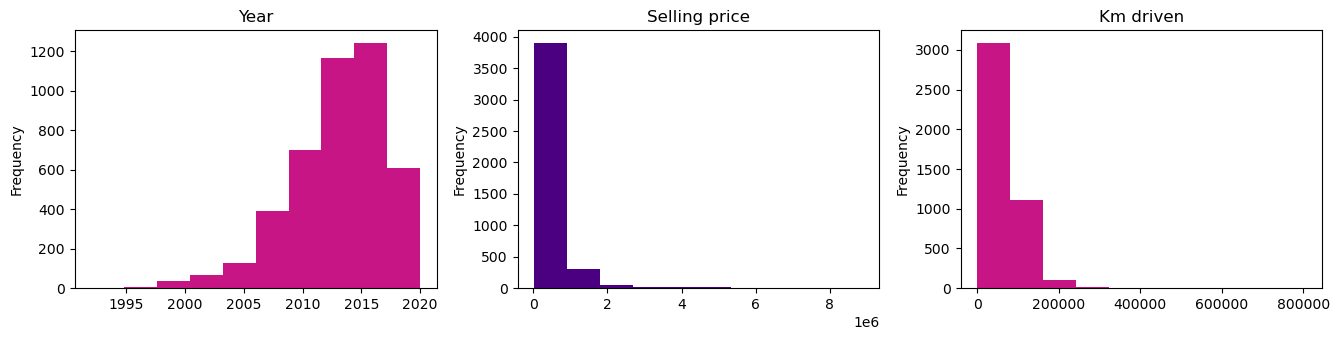

In [10]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)
  
df['year'].plot.hist(title="Year",ax=axis[0],color="MEDIUMVIOLETRED")
df['selling_price'].plot.hist(title="Selling price",ax=axis[1],color="INDIGO")
df['km_driven'].plot.hist(title="Km driven",color="MEDIUMVIOLETRED")

<Axes: title={'center': 'Km driven'}>

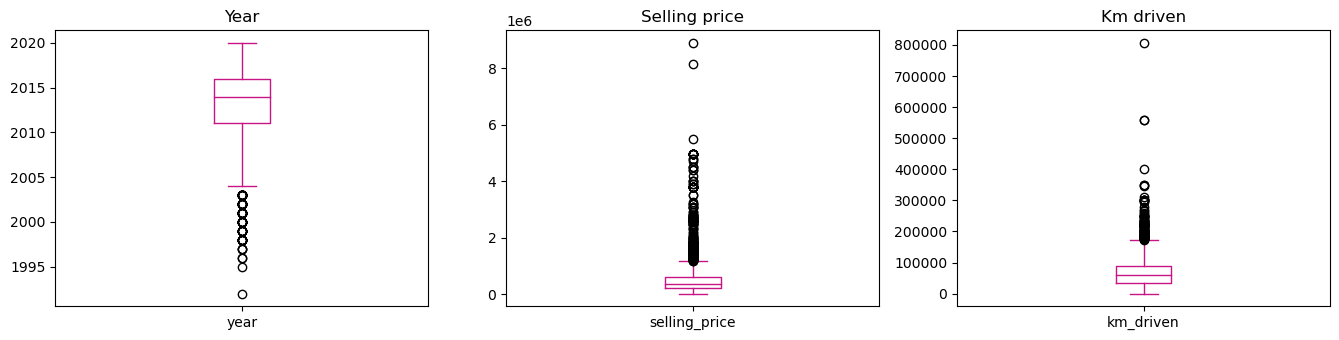

In [11]:
plt.rcParams["figure.figsize"] = [13.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)
  
df['year'].plot.box(title="Year",ax=axis[0],color="MEDIUMVIOLETRED")
df['selling_price'].plot.box(title="Selling price",ax=axis[1],color="MEDIUMVIOLETRED")
df['km_driven'].plot.box(title="Km driven",ax=axis[2],color="MEDIUMVIOLETRED")

### Univarient Analysis for Categorical Variables

In [12]:
categorical=categorical[1:]
categorical

['fuel', 'seller_type', 'transmission', 'owner']

We dropped name attribute because it is a unique key

In [13]:
for column in categorical:
    print("--------------------------------")
    print(column)
    print("--------------------------------")
    print(df[column].value_counts())
    print("--------------------------------")
    print("\n")

--------------------------------
fuel
--------------------------------
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
--------------------------------


--------------------------------
seller_type
--------------------------------
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
--------------------------------


--------------------------------
transmission
--------------------------------
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
--------------------------------


--------------------------------
owner
--------------------------------
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
--------------------------------




<Axes: title={'center': 'Owner'}, xlabel='owner'>

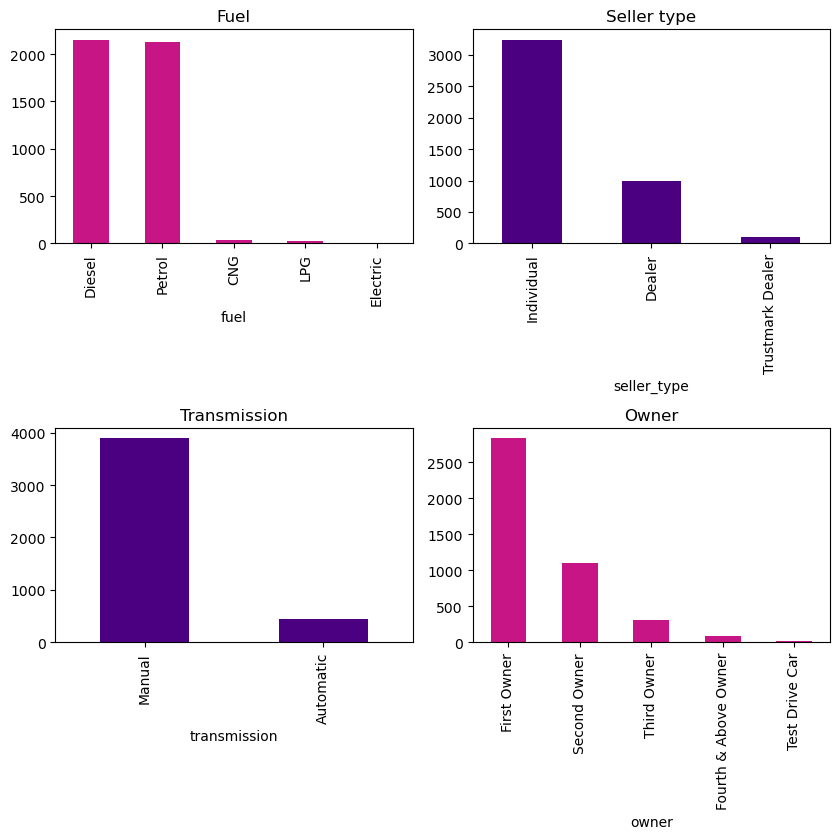

In [14]:
plt.rcParams["figure.figsize"] = [8.50, 8.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 2)
  
df['fuel'].value_counts().plot.bar(title="Fuel",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['seller_type'].value_counts().plot.bar(title="Seller type",ax=axis[0][1],color="INDIGO")
df['transmission'].value_counts().plot.bar(title="Transmission",ax=axis[1][0],color="INDIGO")
df['owner'].value_counts().plot.bar(title="Owner",ax=axis[1][1],color="MEDIUMVIOLETRED")

In [15]:
for column in categorical:
    print("--------------------------------")
    print(column)
    print("--------------------------------")
    print(df[column].value_counts()/len(df[column]))
    print("--------------------------------")
    print("\n")

--------------------------------
fuel
--------------------------------
fuel
Diesel      0.496083
Petrol      0.489171
CNG         0.009217
LPG         0.005300
Electric    0.000230
Name: count, dtype: float64
--------------------------------


--------------------------------
seller_type
--------------------------------
seller_type
Individual          0.747465
Dealer              0.229032
Trustmark Dealer    0.023502
Name: count, dtype: float64
--------------------------------


--------------------------------
transmission
--------------------------------
transmission
Manual       0.896774
Automatic    0.103226
Name: count, dtype: float64
--------------------------------


--------------------------------
owner
--------------------------------
owner
First Owner             0.652535
Second Owner            0.254839
Third Owner             0.070046
Fourth & Above Owner    0.018664
Test Drive Car          0.003917
Name: count, dtype: float64
--------------------------------




<Axes: title={'center': 'Owner'}, xlabel='owner'>

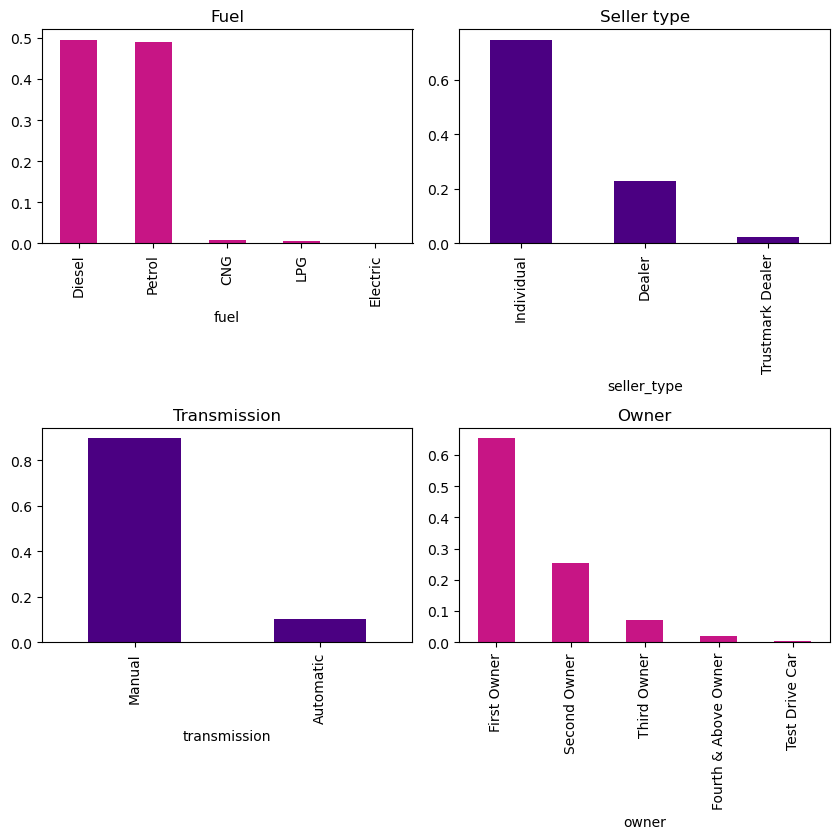

In [16]:
plt.rcParams["figure.figsize"] = [8.50, 8.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 2)
  
    
(df['fuel'].value_counts()/len(df['fuel'])).plot.bar(title="Fuel",ax=axis[0][0],color="MEDIUMVIOLETRED")
(df['seller_type'].value_counts()/len(df['fuel'])).plot.bar(title="Seller type",ax=axis[0][1],color="INDIGO")
(df['transmission'].value_counts()/len(df['fuel'])).plot.bar(title="Transmission",ax=axis[1][0],color="INDIGO")
(df['owner'].value_counts()/len(df['fuel'])).plot.bar(title="Owner",ax=axis[1][1],color="MEDIUMVIOLETRED")

 ## Bivarient Analysis

In [17]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

### Bivarient Analyisis contineous - contineous variable

In [18]:
contineous

['year', 'selling_price', 'km_driven']

<Axes: title={'center': 'Selling Price Vs Km driven'}, xlabel='selling_price', ylabel='km_driven'>

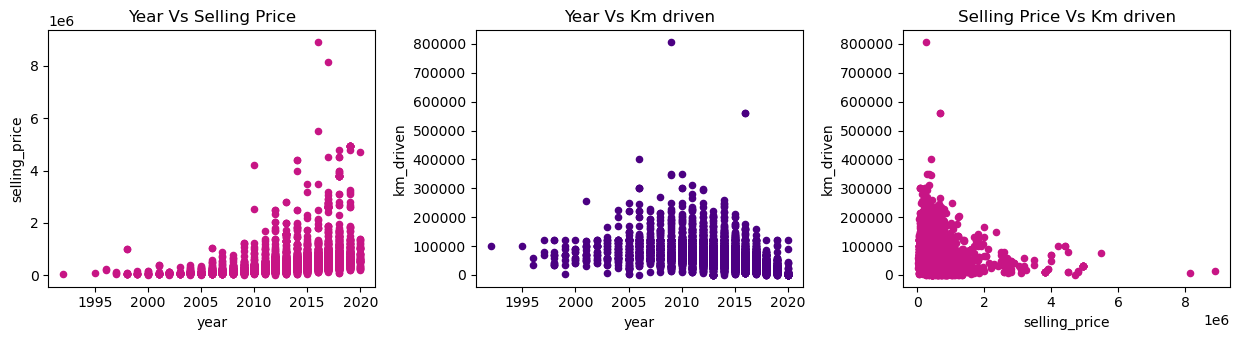

In [19]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)

df.plot.scatter('year','selling_price',title="Year Vs Selling Price",ax=axis[0],color="MEDIUMVIOLETRED")
df.plot.scatter('year','km_driven',title="Year Vs Km driven",ax=axis[1],color="INDIGO")
df.plot.scatter('selling_price','km_driven',title="Selling Price Vs Km driven",ax=axis[2],color="MEDIUMVIOLETRED")

In [25]:
df.drop(['km_driven'], axis=1, inplace=True)

We dropped km_driven because it is weakly correlated to dependent variable.

### Bivarient Analyisis categorical - categorical variable

In [26]:
categorical

['fuel', 'seller_type', 'transmission', 'owner']

In [27]:
pd.crosstab(df['fuel'],df['seller_type'])

seller_type,Dealer,Individual,Trustmark Dealer
fuel,,,
CNG,9,31,0
Diesel,529,1576,48
Electric,1,0,0
LPG,1,22,0
Petrol,454,1615,54


In [28]:
print("fuel-"+"sellertype : "+str(chi2_contingency(pd.crosstab(df['fuel'],df['seller_type']))[1]))
print("fuel-"+"transmission : "+str(chi2_contingency(pd.crosstab(df['fuel'],df['transmission']))[1]))
print("fuel-"+"owner : "+str(chi2_contingency(pd.crosstab(df['fuel'],df['owner']))[1]))
print("sellertype-"+"transmission : "+str(chi2_contingency(pd.crosstab(df['seller_type'],df['transmission']))[1]))
print("sellertype-"+"owner : "+str(chi2_contingency(pd.crosstab(df['seller_type'],df['owner']))[1]))
print("transmission-"+"owner :"+str(chi2_contingency(pd.crosstab(df['transmission'],df['owner']))[1]))

fuel-sellertype : 0.040954247748934705
fuel-transmission : 6.405461271607848e-05
fuel-owner : 0.19419576912621267
sellertype-transmission : 3.567633340656093e-44
sellertype-owner : 1.2332824494323794e-75
transmission-owner :1.961948581702505e-07


In [29]:
alpha=0.05
if alpha<=chi2_contingency(pd.crosstab(df['fuel'],df['seller_type']))[1]:
                           print("Drop seller_type because it is related to fuel")
if alpha<=chi2_contingency(pd.crosstab(df['fuel'],df['transmission']))[1]:
                           print("Drop transmission because it is related to fuel")
if alpha<=chi2_contingency(pd.crosstab(df['fuel'],df['owner']))[1]:
                           print("Drop owner because it is related to fuel")
if alpha<=chi2_contingency(pd.crosstab(df['seller_type'],df['transmission']))[1]:
                           print("Drop transmission because it is related to seller_type")
if alpha<=chi2_contingency(pd.crosstab(df['seller_type'],df['owner']))[1]:
                           print("Drop owner because it is related to seller_type")
if alpha<=chi2_contingency(pd.crosstab(df['transmission'],df['owner']))[1]:
                           print("Drop owner because it is related to transmission")

Drop owner because it is related to fuel


In [30]:
df.drop(['owner'], axis=1, inplace=True)

In [31]:
categorical=categorical[:-1]
contineous=contineous[:-1]

### Bivarient Analyisis Continuous - Categorical variable

In [32]:
contineous

['year', 'selling_price']

In [33]:
categorical

['fuel', 'seller_type', 'transmission']

#### Calculations for year variable

In [34]:
print("----------------------------------")
print(df.groupby('fuel')['year'].mean())
print("----------------------------------")
print(df.groupby('seller_type')['year'].mean())
print("----------------------------------")
print(df.groupby('transmission')['year'].mean())
print("----------------------------------")

----------------------------------
fuel
CNG         2013.475000
Diesel      2013.606595
Electric    2006.000000
LPG         2010.130435
Petrol      2012.595855
Name: year, dtype: float64
----------------------------------
seller_type
Dealer              2014.200201
Individual          2012.665228
Trustmark Dealer    2015.813725
Name: year, dtype: float64
----------------------------------
transmission
Automatic    2014.877232
Manual       2012.885149
Name: year, dtype: float64
----------------------------------


<Axes: xlabel='transmission'>

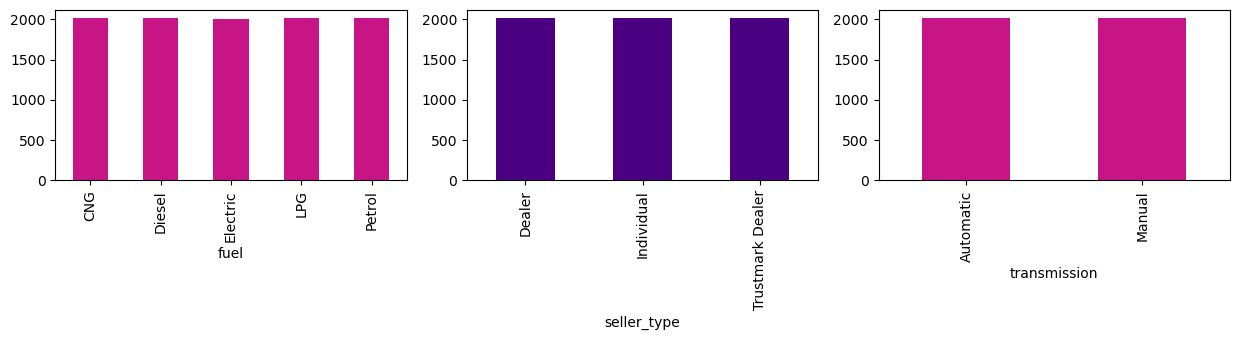

In [35]:
df.groupby('fuel')['year'].mean().plot.bar(ax=axis[0],color="MEDIUMVIOLETRED")

plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)

df.groupby('fuel')['year'].mean().plot.bar(ax=axis[0],color="MEDIUMVIOLETRED")
df.groupby('seller_type')['year'].mean().plot.bar(ax=axis[1],color="INDIGO")
df.groupby('transmission')['year'].mean().plot.bar(ax=axis[2],color="MEDIUMVIOLETRED")

<Axes: title={'center': 'year'}, xlabel='transmission'>

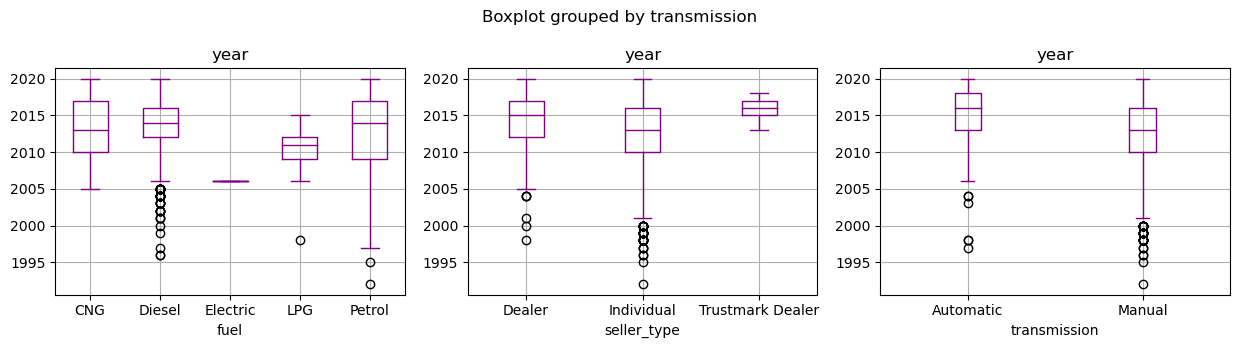

In [36]:
df.groupby('fuel')['year'].mean().plot.bar(ax=axis[0],color="MEDIUMVIOLETRED")

plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)

df.boxplot('year',by='fuel',ax=axis[0],color="PURPLE")
df.boxplot('year',by='seller_type',ax=axis[1],color="PURPLE")
df.boxplot('year',by='transmission',ax=axis[2],color="PURPLE")

In [37]:
new = ols('year ~ fuel',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
fuel,1350.617773,4.0,19.323293,9.007429e-16
Residual,75749.613564,4335.0,NaN,NaN


In [38]:
if 0.05<=9.007429e-16:
    print("We are not selecting fuel attribute")
else:
    print("We are selecting fuel attribute")

We are selecting fuel attribute


In [39]:
new = ols('year ~ seller_type',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
seller_type,2567.172861,2.0,74.69054,1.283625e-32
Residual,74533.058475,4337.0,NaN,NaN


In [40]:
if 0.05<=1.283625e-32:
    print("We are not selecting seller_type attribute")
else:
    print("We are selecting seller_type attribute")

We are selecting seller_type attribute


In [41]:
new = ols('year ~ fuel',data=df).fit()
an = sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
fuel,1350.617773,4.0,19.323293,9.007429e-16
Residual,75749.613564,4335.0,NaN,NaN


In [42]:
Automatic = df[df['transmission']=='Automatic']
Manual = df[df['transmission']=='Manual']
ttest_ind(Automatic['year'],Manual['year'],nan_policy='omit')

TtestResult(statistic=9.570669428507182, pvalue=1.728962675012402e-21, df=4338.0)

In [43]:
if 0.05<=ttest_ind(Automatic['year'],Manual['year'],nan_policy='omit')[1]:
    print("We are not selecting transmission attribute")
else:
    print("We are selecting transmission attribute")

We are selecting transmission attribute


#### Calculations for selling_price variable

In [44]:
print("----------------------------------")
print(df.groupby('fuel')['selling_price'].mean())
print("----------------------------------")
print(df.groupby('seller_type')['selling_price'].mean())
print("----------------------------------")
print(df.groupby('transmission')['selling_price'].mean())
print("----------------------------------")

----------------------------------
fuel
CNG         277174.925000
Diesel      669094.252206
Electric    310000.000000
LPG         167826.043478
Petrol      344840.137541
Name: selling_price, dtype: float64
----------------------------------
seller_type
Dealer              721822.890342
Individual          424505.419236
Trustmark Dealer    914950.980392
Name: selling_price, dtype: float64
----------------------------------
transmission
Automatic    1.408154e+06
Manual       4.000667e+05
Name: selling_price, dtype: float64
----------------------------------


<Axes: xlabel='transmission'>

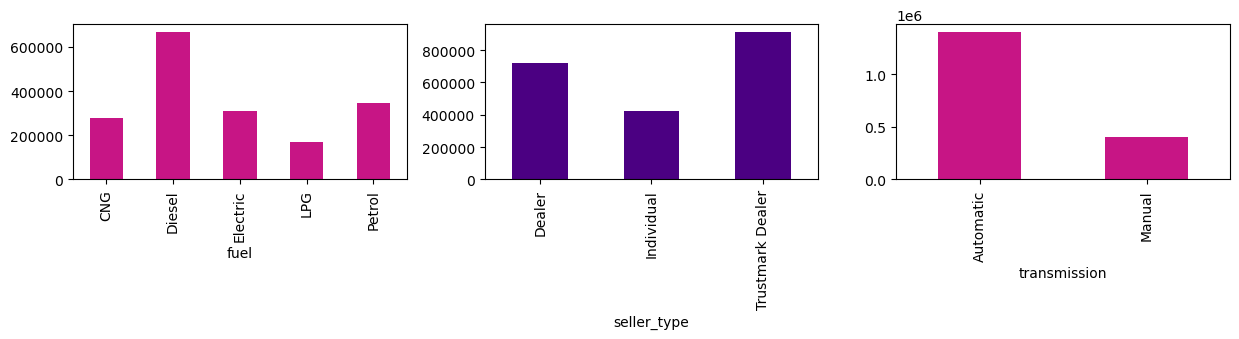

In [45]:
df.groupby('fuel')['selling_price'].mean().plot.bar(ax=axis[0],color="MEDIUMVIOLETRED")

plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)

df.groupby('fuel')['selling_price'].mean().plot.bar(ax=axis[0],color="MEDIUMVIOLETRED")
df.groupby('seller_type')['selling_price'].mean().plot.bar(ax=axis[1],color="INDIGO")
df.groupby('transmission')['selling_price'].mean().plot.bar(ax=axis[2],color="MEDIUMVIOLETRED")

<Axes: title={'center': 'selling_price'}, xlabel='transmission'>

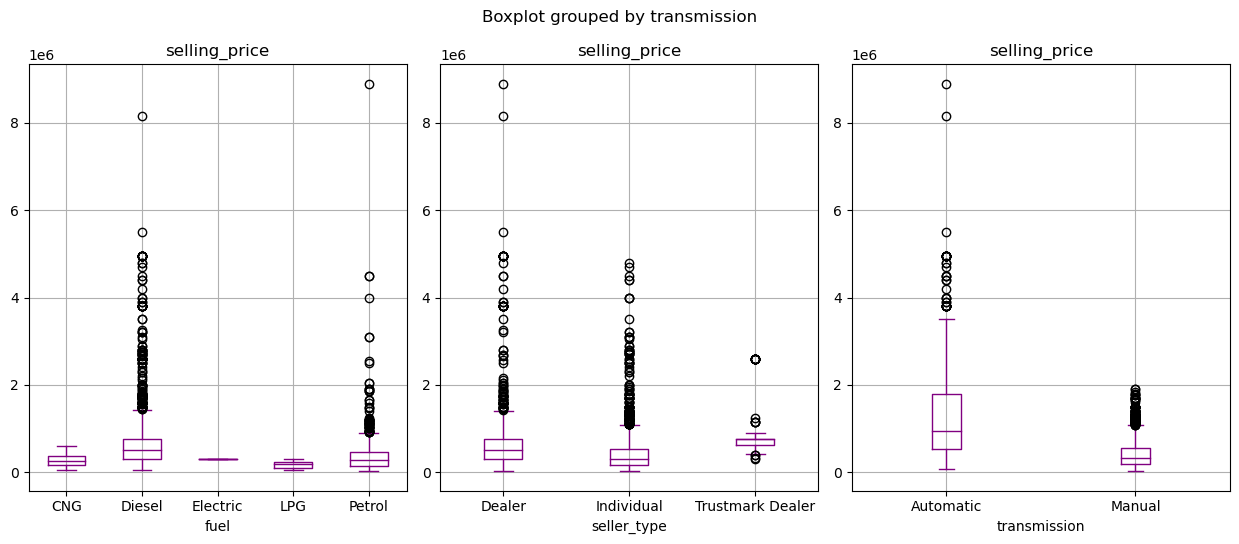

In [46]:
df.groupby('fuel')['selling_price'].mean().plot.bar(ax=axis[0],color="MEDIUMVIOLETRED")

plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)

df.boxplot('selling_price',by='fuel',ax=axis[0],color="PURPLE")
df.boxplot('selling_price',by='seller_type',ax=axis[1],color="PURPLE")
df.boxplot('selling_price',by='transmission',ax=axis[2],color="PURPLE")

## Missing Value Treatement

In [47]:
contineous

['year', 'selling_price']

In [48]:
categorical

['fuel', 'seller_type', 'transmission']

In [49]:
df.shape

(4340, 6)

In [50]:
df.describe()

,year,selling_price
count,4340.000000,4.340000e+03
mean,2013.090783,5.041273e+05
std,4.215344,5.785487e+05
min,1992.000000,2.000000e+04
25%,2011.000000,2.087498e+05
50%,2014.000000,3.500000e+05
75%,2016.000000,6.000000e+05
max,2020.000000,8.900000e+06


In [51]:
df.isnull().sum()

name             0
year             0
selling_price    0
fuel             0
seller_type      0
transmission     0
dtype: int64

In [52]:
df.isnull().mean()

name             0.0
year             0.0
selling_price    0.0
fuel             0.0
seller_type      0.0
transmission     0.0
dtype: float64

There are no missing values in the dataset

## Outliers Treatement

In [53]:
contineous

['year', 'selling_price']

<Axes: >

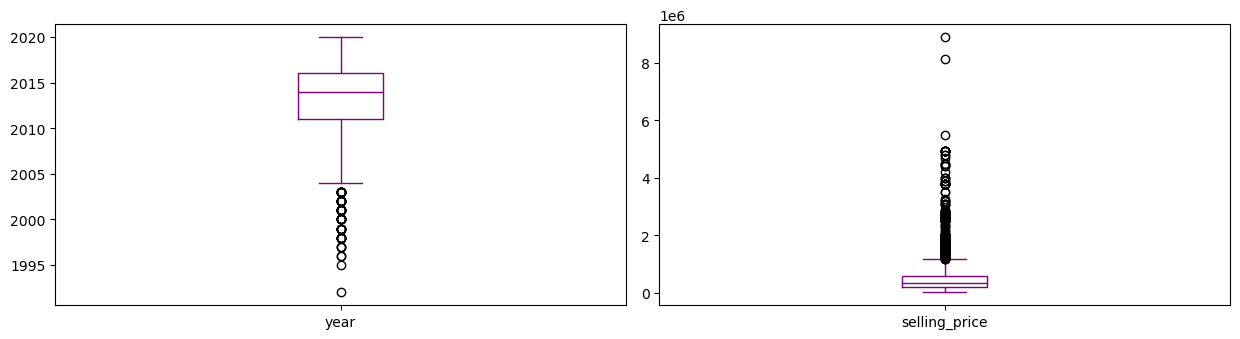

In [54]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

df['year'].plot.box(ax=axis[0],color="PURPLE")
df['selling_price'].plot.box(ax=axis[1],color="PURPLE")

### Outlier Treatement for year variable

In [55]:
Q1 = df.year.quantile(0.25)
Q3 = df.year.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [56]:
lower_limit,upper_limit

(2003.5, 2023.5)

In [57]:
df.loc[df['year']>upper_limit,'year'] = np.mean(df['year'])
df.loc[df['year']<lower_limit,'year'] = np.mean(df['year'])

### Outlier Treatement for selling_price variable

In [58]:
Q1 = df.selling_price.quantile(0.25)
Q3 = df.selling_price.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [59]:
lower_limit,upper_limit

(-378125.625, 1186875.375)

In [60]:
df.loc[df['selling_price']>upper_limit,'selling_price'] = np.mean(df['selling_price'])
df.loc[df['selling_price']<lower_limit,'selling_price'] = np.mean(df['selling_price'])

<Axes: >

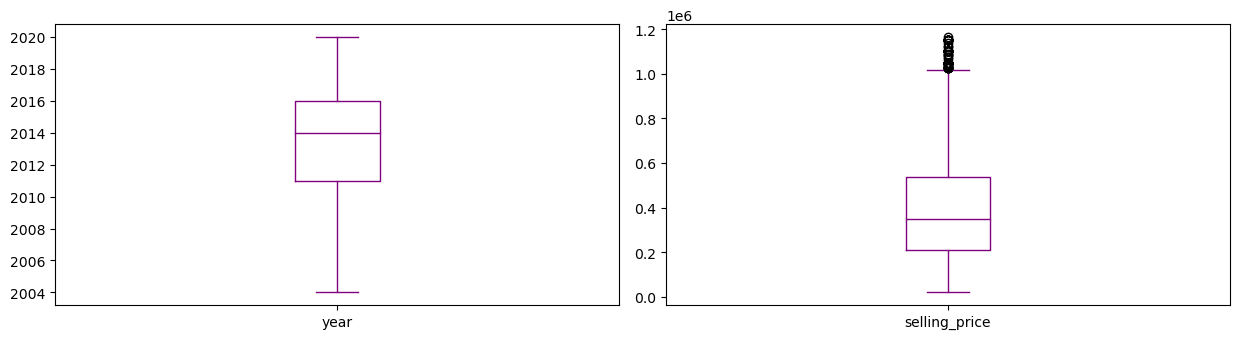

In [61]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

df['year'].plot.box(ax=axis[0],color="PURPLE")
df['selling_price'].plot.box(ax=axis[1],color="PURPLE")

<Axes: xlabel='year', ylabel='selling_price'>

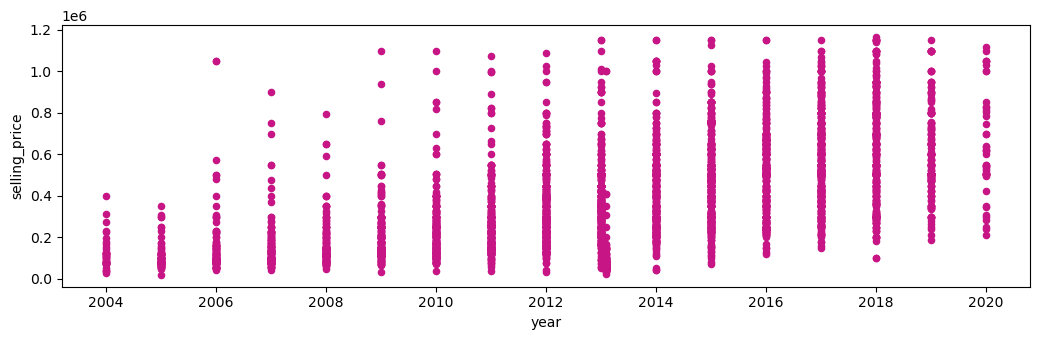

In [62]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True
df.plot.scatter('year','selling_price',color="MEDIUMVIOLETRED")

In [63]:
df.to_csv('CDSPP_Preprocessed.csv', encoding='utf-8', index=False)